### GROUP #10 - Supplier Risk Classification by using the SIFOT

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv('data_po.csv')
data.head(3)

,#P_Order,PO_Line,PORel Num,Confirmed,Order Qty,Received Qty,IUM,Order Value,Received Value,Open Qty,...,Leadtime Expected,Days From Order Date,Entry Person ID,Approved Date,BTOOrder Num,Approval Status,Ready To Approve,Approved Amount,Inspection Required,Job Num
0,90394,1,1,Y,5,5,EA,121.7385,121.7385,0,...,10,202,CMCH,1-Jan-00,0,Approved,True,0,False,NaN
1,90394,2,1,Y,5,5,EA,121.7385,121.7385,0,...,10,202,CMCH,1-Jan-00,0,Approved,True,0,False,NaN
2,90394,3,1,Y,5,5,EA,121.7385,121.7385,0,...,10,202,CMCH,1-Jan-00,0,Approved,True,0,False,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45241 entries, 0 to 45240
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #P_Order              45241 non-null  int64  
 1   PO_Line               45241 non-null  int64  
 2   PORel Num             45241 non-null  int64  
 3   Confirmed             45241 non-null  object 
 4   Order Qty             45241 non-null  int64  
 5   Received Qty          45241 non-null  int64  
 6   IUM                   45241 non-null  object 
 7   Order Value           45241 non-null  float64
 8   Received Value        45241 non-null  float64
 9   Open Qty              45241 non-null  int64  
 10  Open Value            45241 non-null  object 
 11  Vendor Qty            45241 non-null  int64  
 12  Total Order           45241 non-null  object 
 13  Part Num              45241 non-null  object 
 14  Order Type            45241 non-null  object 
 15  On Time            

In [4]:
### Dropping columns

In [5]:
#### We will identify the category  as direct materials

In [6]:
unique_order_types = data['Order Type'].unique()
print("Unique values of 'Order Type' column:", unique_order_types)

Unique values of 'Order Type' column: ['Expense' 'Subcontract' 'Stock' 'Material']


In [7]:
filter = (data['Order Type'] != 'Expense') & (data['Order Type'] != 'Subcontract')
data_2 = data[filter]
unique_order_types = data_2['Order Type'].unique()
print("Unique values of 'Order Type' column:", unique_order_types)

Unique values of 'Order Type' column: ['Stock' 'Material']


In [8]:
#### Now we remove non-neccesary columns

In [9]:
columns_drop = ['Open Qty', 'Open Value', 'Vendor Qty','Account Name','Division','Department','Chart','Chart Name','BTOOrder Num','Ready To Approve']
data_2.drop(columns=columns_drop, inplace=True)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30127 entries, 181 to 45238
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #P_Order              30127 non-null  int64  
 1   PO_Line               30127 non-null  int64  
 2   PORel Num             30127 non-null  int64  
 3   Confirmed             30127 non-null  object 
 4   Order Qty             30127 non-null  int64  
 5   Received Qty          30127 non-null  int64  
 6   IUM                   30127 non-null  object 
 7   Order Value           30127 non-null  float64
 8   Received Value        30127 non-null  float64
 9   Total Order           30127 non-null  object 
 10  Part Num              30127 non-null  object 
 11  Order Type            30127 non-null  object 
 12  On Time               27113 non-null  float64
 13  On Time 3 Days        27087 non-null  float64
 14  Sites                 30127 non-null  object 
 15  Vendor ID             

In [10]:
data_2.head(2)

,#P_Order,PO_Line,PORel Num,Confirmed,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,Invoice Date,Days Late,Leadtime Expected,Days From Order Date,Entry Person ID,Approved Date,Approval Status,Approved Amount,Inspection Required,Job Num
181,107528,1,1,Y,183,60,KG,325.4472,106.7040,"11,757.56",...,9-Feb-23,720,23,743,CMCH,9-Mar-21,Approved,0,False,NaN
182,107528,2,1,Y,1142,576,M3,3500.6868,1765.6704,"11,757.56",...,26-Nov-23,809,23,832,CMCH,9-Mar-21,Approved,0,False,NaN


In [11]:
### We create a new primary key by using the Purchase Order Number + Purchase Line

In [12]:
data_2['KEY'] = data['#P_Order'].astype(str) + '_' + data['PO_Line'].astype(str)
data_2.head(2)

,#P_Order,PO_Line,PORel Num,Confirmed,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,Days Late,Leadtime Expected,Days From Order Date,Entry Person ID,Approved Date,Approval Status,Approved Amount,Inspection Required,Job Num,KEY
181,107528,1,1,Y,183,60,KG,325.4472,106.7040,"11,757.56",...,720,23,743,CMCH,9-Mar-21,Approved,0,False,NaN,107528_1
182,107528,2,1,Y,1142,576,M3,3500.6868,1765.6704,"11,757.56",...,809,23,832,CMCH,9-Mar-21,Approved,0,False,NaN,107528_2


In [13]:
data_2 = data_2[data_2['Days Late'] <= 250]

In [14]:
## We merge new features

In [15]:
### Part master data

In [16]:
part_master=pd.read_csv('Part_master.csv')

In [17]:
part_master.rename(columns={'PARTNUM': 'Part Num'}, inplace=True)

In [18]:
merged_data_0 = pd.merge(data_2, part_master[['Part Num', 'TAXONOMY']], on='Part Num', how='left')
merged_data_0.head(2)

,#P_Order,PO_Line,PORel Num,Confirmed,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,Leadtime Expected,Days From Order Date,Entry Person ID,Approved Date,Approval Status,Approved Amount,Inspection Required,Job Num,KEY,TAXONOMY
0,108044,1,1,Y,4,0,ST,20.0772,0.0,20.24,...,9,-7711,CAHI,10-Feb-21,Approved,0,False,1038-M-T31,108044_1,PPE / Safety Equipment / Facility Management
1,108044,1,1,Y,4,0,ST,20.0772,0.0,20.24,...,9,-7711,CAHI,10-Feb-21,Approved,0,False,1038-M-T31,108044_1,PPE / Safety Equipment / Facility Management


In [19]:
merged_data_0['TAXONOMY'].fillna('Indirect', inplace=True)

In [20]:
### Supplier perfomance

In [21]:
performance=pd.read_csv('supplier_performance.csv')
performance.head(2)

,VENDOR ID,COUNTRY,VENDOR GROUP,TERMS CODE,PUR POINT,GLOBAL STATUS,PURCHASE CATEGORY,PSP QUALIFICATION,NDA,AGREEMENT OR APL,QTY LINES (last 12 month),QTY PO (last 12 month),PURCHASE NET AMOUNT IN USD (last 12 month),PERFORMANCE CLASSIFICATION,ASSESSMENT CLASSIFICATION,ASSESSMENT FLS SCORE
0,56380,United States of America,Intercompany,INTC,NaN,Non-Preferred,Wear Parts,NaN,NaN,NaN,713.0,421.0,8979514.577,B,-,NaN
1,105236,Peru,Trade Supplier,120I,NaN,Global,Wear Parts,NaN,NaN,NaN,136.0,62.0,5887596.550,A,A,409.0


In [22]:
performance.rename(columns={'VENDOR ID': 'Vendor ID'}, inplace=True)

In [23]:
performance.head(1)

,Vendor ID,COUNTRY,VENDOR GROUP,TERMS CODE,PUR POINT,GLOBAL STATUS,PURCHASE CATEGORY,PSP QUALIFICATION,NDA,AGREEMENT OR APL,QTY LINES (last 12 month),QTY PO (last 12 month),PURCHASE NET AMOUNT IN USD (last 12 month),PERFORMANCE CLASSIFICATION,ASSESSMENT CLASSIFICATION,ASSESSMENT FLS SCORE
0,56380,United States of America,Intercompany,INTC,NaN,Non-Preferred,Wear Parts,NaN,NaN,NaN,713.0,421.0,8979514.577,B,-,NaN


In [24]:
merged_data = pd.merge(merged_data_0, performance[['Vendor ID', 'PERFORMANCE CLASSIFICATION']], on='Vendor ID', how='left')
merged_data.head(2)

,#P_Order,PO_Line,PORel Num,Confirmed,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,Days From Order Date,Entry Person ID,Approved Date,Approval Status,Approved Amount,Inspection Required,Job Num,KEY,TAXONOMY,PERFORMANCE CLASSIFICATION
0,108044,1,1,Y,4,0,ST,20.0772,0.0,20.24,...,-7711,CAHI,10-Feb-21,Approved,0,False,1038-M-T31,108044_1,PPE / Safety Equipment / Facility Management,A
1,108044,1,1,Y,4,0,ST,20.0772,0.0,20.24,...,-7711,CAHI,10-Feb-21,Approved,0,False,1038-M-T31,108044_1,PPE / Safety Equipment / Facility Management,A


In [25]:
key_index = merged_data.columns.get_loc('KEY')
merged_data.insert(0, 'KEY', merged_data.pop('KEY'))
merged_data.head(2)

,KEY,#P_Order,PO_Line,PORel Num,Confirmed,Order Qty,Received Qty,IUM,Order Value,Received Value,...,Leadtime Expected,Days From Order Date,Entry Person ID,Approved Date,Approval Status,Approved Amount,Inspection Required,Job Num,TAXONOMY,PERFORMANCE CLASSIFICATION
0,108044_1,108044,1,1,Y,4,0,ST,20.0772,0.0,...,9,-7711,CAHI,10-Feb-21,Approved,0,False,1038-M-T31,PPE / Safety Equipment / Facility Management,A
1,108044_1,108044,1,1,Y,4,0,ST,20.0772,0.0,...,9,-7711,CAHI,10-Feb-21,Approved,0,False,1038-M-T31,PPE / Safety Equipment / Facility Management,A


In [26]:
merged_data.dropna(subset=['PERFORMANCE CLASSIFICATION'], inplace=True)

In [27]:
# function for creating dummies for categorical variables
def create_dummies(x, merged_data):
    temp_df = pd.get_dummies(merged_data[x], prefix=x, dtype=int)
    merged_data = pd.concat([merged_data, temp_df], axis=1)
    return merged_data

categorical_vars = ['Confirmed', 'Order Type', 'PERFORMANCE CLASSIFICATION', 'Sites','TAXONOMY']

for x in categorical_vars:
    merged_data = create_dummies(x, merged_data)

In [28]:
# dropping columns which were converted to dummies
merged_data = merged_data.drop(columns=['Confirmed', 'Order Type', 'PERFORMANCE CLASSIFICATION', 'Sites'])

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58435 entries, 0 to 58442
Columns: 280 entries, KEY to TAXONOMY_water / Utility Expenses / Facility Management
dtypes: bool(3), float64(4), int64(250), object(23)
memory usage: 124.1+ MB


In [30]:
merged_data['Total Order'] = merged_data['Total Order'].str.replace(',', '').astype('float')

### The columns the we should tentaviliy explore as independent features:
-Order Value
-Part Num
-Order type
-Sites
-Vendor ID
-Buyer ID
-Product Group Name
-Performance Classification
-ASSESSMENT SCORE

Setting categorical target variable to represent whether or not an order was received past the promise date

In [31]:
merged_data['is_late'] = np.where(merged_data['Days Late'] <= 0, 0, 1)

In [32]:
merged_data.head(2)

,KEY,#P_Order,PO_Line,PORel Num,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,TAXONOMY_Valves Assembly / Valves & Valve Assemblies / Plant Utilities,TAXONOMY_Vibrating Feeder & Screens / Feeders / Conveying Equipment,TAXONOMY_WEP1 / Wear Parts Fabrication / Fabrication,TAXONOMY_Water Distribution Systems / Auxiliary Equipment / Plant Utilities,TAXONOMY_Weight Bridge Truck & Rail / Auxiliary Equipment / Plant Utilities,TAXONOMY_Winches / Lifting Equipment / Plant Utilities,TAXONOMY_Workshops & Store Facilities / Workshop & Tools / Plant Utilities,TAXONOMY_Worm Gear motors / Worm Gear motors / Gearboxes,TAXONOMY_water / Utility Expenses / Facility Management,is_late
0,108044_1,108044,1,1,4,0,ST,20.0772,0.0,20.24,...,0,0,0,0,0,0,0,0,0,0
1,108044_1,108044,1,1,4,0,ST,20.0772,0.0,20.24,...,0,0,0,0,0,0,0,0,0,0


In [33]:
### Describing selected features

In [34]:
x_names = ['Order Qty', 'Order Value', 'Total Order', 'Leadtime Expected',
       'Confirmed_N', 'Confirmed_Y', 'Order Type_Material', 'Order Type_Stock',
       'PERFORMANCE CLASSIFICATION_A', 'PERFORMANCE CLASSIFICATION_B',
       'PERFORMANCE CLASSIFICATION_C', 'Sites_SANTIAGO', 'Sites_VALPARAISO']

In [35]:
y = merged_data.is_late
X = pd.DataFrame(merged_data)

In [36]:
# randomly split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=250)

In [37]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#import pprint to visualize grid search test values
from pprint import pprint

The results show the Random Forest, Decision Tree Classifier, and KNN showed promise. We will continue with hyperparameter tuning for these models to compare optimal performance.

In [148]:
# Tune random forest

# Number of trees in random forest
n_estimators = [10, 50, 100, 150, 200, 250, 300]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [None, 1, 5, 10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid_rf)

{'bootstrap': [True, False],
 'max_depth': [None, 1, 5, 10],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4, 10],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100, 150, 200, 250, 300]}


In [149]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(criterion = 'entropy')

# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train[x_names], y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 1, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300]},
                   random_state=42, verbose=2)

In [150]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [151]:
# Tune decision tree classifier

# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [None, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]

# Create the random grid
random_grid_dt = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid_dt)

{'max_depth': [None, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4, 10],
 'min_samples_split': [2, 5, 10]}


In [152]:
# Use the grid search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier(criterion = 'entropy')

# Grid search of all parameter combinations
dt_random = GridSearchCV(estimator = dt, param_grid = random_grid_dt, cv = 10, verbose=2, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train[x_names], y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10, 15, 20, 25, 30, 35, 40,
                                       45, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [153]:
dt_random.best_params_

{'max_depth': 45,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [154]:
# Tune knn

# Number of neighbors
n_neighbors = np.arange(2,100,1)

# Create the random grid
random_grid_knn = {'n_neighbors': n_neighbors}

pprint(random_grid_knn)

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}


In [155]:
# Use the grid search for best hyperparameters
# First create the base model to tune
kn = KNeighborsClassifier()

# Grid search of all parameter combinations
kn_random = GridSearchCV(estimator = kn, param_grid = random_grid_knn, cv = 10, verbose=2, n_jobs = -1)
# Fit the random search model
kn_random.fit(scale(X_train[x_names]), y_train)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=2)

In [156]:
kn_random.best_params_

{'n_neighbors': 2}

In [38]:
# Initialize classifiers in consideration
models = []
models.append(('Logistic Regression', LogisticRegression()))
# models.append(('SVC', SVC(kernel = 'linear')))
# models.append(('Kernel SVM', SVC(kernel = 'rbf')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=None, max_features=None, min_samples_leaf=1,
                                 min_samples_split=5, criterion='entropy')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None, max_features='log2',
                                 min_samples_leaf=2, min_samples_split=5, criterion='entropy')))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train[x_names], y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train[x_names], y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['AUC Mean'], ascending=False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Random Forest,97.12,0.36,91.93,0.51
3,Decision Tree Classifier,92.82,0.49,91.37,0.33
1,KNN,86.90,0.66,78.75,0.65
0,Logistic Regression,58.44,4.63,66.57,0.67
2,Gaussian NB,51.46,1.03,66.11,0.44


In [39]:
### 2nd features Scenario, by adding Taxonomy ( additional feature for Order Type)

In [40]:
product_group_columns = [col for col in merged_data.columns if col.startswith('TAXONOMY_')]
product_group_columns

['TAXONOMY_Advertising / Marketing / Operational Services',
 'TAXONOMY_Air Blasters / Auxiliary Equipment / Plant Utilities',
 'TAXONOMY_Air Clutches / Clutches / Gearboxes',
 'TAXONOMY_Air Receiver / Air Equipment / Plant Utilities',
 'TAXONOMY_Analytical Instrumentation / Instrumentation & Analyzing Systems / Electrical & Automation',
 'TAXONOMY_Apron Feeder / Feeders / Conveying Equipment',
 'TAXONOMY_Assemblies  - Non Standard / Hydraulic Cylinders / Hydraulic & Pneumatics',
 'TAXONOMY_Backstops / Clutches / Gearboxes',
 'TAXONOMY_Ball  / Roller Bearings / Bearings',
 'TAXONOMY_Ball Valves / Valves & Valve Assemblies / Plant Utilities',
 'TAXONOMY_Bars / Raw Material / Fabrication',
 'TAXONOMY_Bearing Accessories / Bearing Accessories / Bearings',
 'TAXONOMY_Bearing Seals / Bearings Assembly Parts / Bearings',
 'TAXONOMY_Belt Cleaner / Belt Scrapper / Conveyors Parts / Conveying Equipment',
 'TAXONOMY_Belt Covers / Conveyors Parts / Conveying Equipment',
 'TAXONOMY_Blended Cement /

### Final Model Predictions

#### Chosen Model:

In [41]:
model = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='log2', min_samples_leaf=2,
                               min_samples_split=5, criterion='entropy', random_state=12345)
model.fit(X_train[x_names], y_train)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=12345)

In [42]:
# probabiliy predictions for training data
train_probs=model.predict_proba(X_train[x_names])
train_preds = model.predict(X_train[x_names])

# probabiliy predictions for test data
test_probs=model.predict_proba(X_test[x_names])
y_preds = model.predict(X_test[x_names])

# train auc
train_auc = roc_auc_score(y_train, train_probs[:, 1])
print('Train AUC: ', train_auc)

# test auc
model_auc = roc_auc_score(y_test, test_probs[:, 1])
print('Test AUC: ', model_auc)

Train AUC:  0.9991633344293747
Test AUC:  0.9766884373311526


In [43]:
# calculating train f1
train_f1 = f1_score(y_train, train_preds)
train_f1

0.9773969567144334

Text(0.5, 1.0, 'Model Feature Importance')

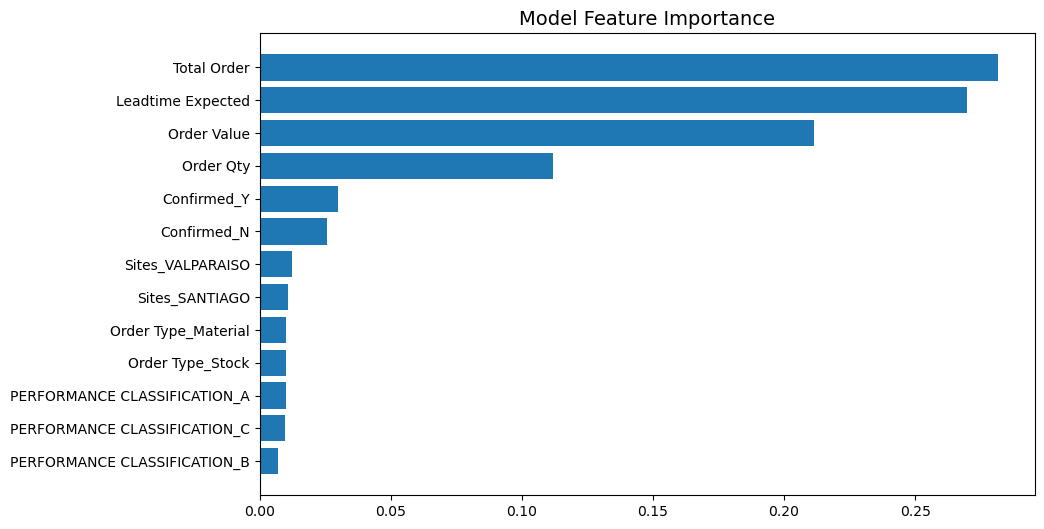

In [52]:
# feature importance for classification tree model
plt.figure(figsize=(10,6))
fi_df = pd.DataFrame()
fi_df['feature_importance'] = model.feature_importances_
fi_df['feature'] = model.feature_names_in_
fi_df.sort_values(by='feature_importance', inplace=True)
plt.barh('feature', 'feature_importance', data=fi_df)
plt.title('Model Feature Importance',fontsize = "14")

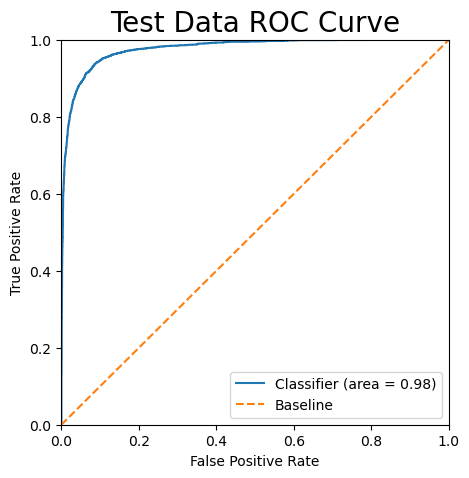

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:, 1])

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % model_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Test Data ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

In [45]:
# calculating test f1
test_f1 = f1_score(y_test, y_preds)
test_f1

0.8904904201089823

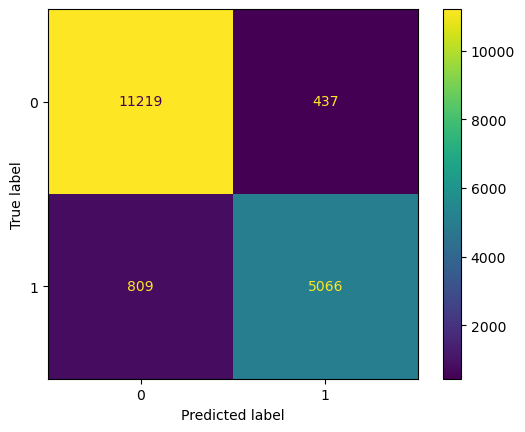

In [46]:
# Evaluate using the test data

cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [47]:
risk_prob_df = pd.DataFrame(X_test)
risk_prob_df['probability'] = test_probs[:, 1]
risk_prob_df

,KEY,#P_Order,PO_Line,PORel Num,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,TAXONOMY_Vibrating Feeder & Screens / Feeders / Conveying Equipment,TAXONOMY_WEP1 / Wear Parts Fabrication / Fabrication,TAXONOMY_Water Distribution Systems / Auxiliary Equipment / Plant Utilities,TAXONOMY_Weight Bridge Truck & Rail / Auxiliary Equipment / Plant Utilities,TAXONOMY_Winches / Lifting Equipment / Plant Utilities,TAXONOMY_Workshops & Store Facilities / Workshop & Tools / Plant Utilities,TAXONOMY_Worm Gear motors / Worm Gear motors / Gearboxes,TAXONOMY_water / Utility Expenses / Facility Management,is_late,probability
35670,148958_13,148958,13,1,84,84,ST,898.2792,898.2792,8915.18,...,0,0,0,0,0,0,0,0,0,0.126253
57402,163902_1,163902,1,1,8,0,EA,299.3328,0.0000,255.81,...,0,0,0,0,0,0,0,0,0,0.152180
26589,144612_6,144612,6,4,5,5,EA,18.3690,18.3690,6848.89,...,0,0,0,0,0,0,0,0,0,0.007104
40659,152330_2,152330,2,1,5,5,EA,193.1670,193.1670,1499.40,...,0,0,0,0,0,0,0,0,0,0.016617
14879,139142_3,139142,3,1,1,1,EA,95.0157,95.0157,1166.14,...,0,0,0,0,0,0,0,0,0,0.019419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,142840_1,142840,1,1,1,1,EA,839.0655,839.0655,846.23,...,0,0,0,0,0,0,0,0,0,0.249880
30111,146354_12,146354,12,3,4,4,EA,35.7084,35.7084,6267.28,...,0,0,0,0,0,0,0,0,0,0.034705
8138,135408_5,135408,5,1,3,3,EA,414.1800,414.1800,2178.00,...,0,0,0,0,0,0,0,0,0,0.007958
26310,144500_43,144500,43,4,4,4,EA,385.0704,385.0704,27397.34,...,0,0,0,0,0,0,0,0,0,0.025790


In [48]:
risk_prob_df.sort_values(by=['probability'], inplace=True, ascending=True)

In [49]:
risk_prob_df['rank'] = risk_prob_df['probability'].rank(method='first')

In [50]:
risk_prob_df

,KEY,#P_Order,PO_Line,PORel Num,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,TAXONOMY_WEP1 / Wear Parts Fabrication / Fabrication,TAXONOMY_Water Distribution Systems / Auxiliary Equipment / Plant Utilities,TAXONOMY_Weight Bridge Truck & Rail / Auxiliary Equipment / Plant Utilities,TAXONOMY_Winches / Lifting Equipment / Plant Utilities,TAXONOMY_Workshops & Store Facilities / Workshop & Tools / Plant Utilities,TAXONOMY_Worm Gear motors / Worm Gear motors / Gearboxes,TAXONOMY_water / Utility Expenses / Facility Management,is_late,probability,rank
46254,156516_17,156516,17,1,10,10,EA,13.5720,13.5720,2530.40,...,0,0,0,0,0,0,0,0,0.000000,1.0
34511,148426_13,148426,13,1,12,12,EA,21.4812,21.4812,5779.73,...,0,0,0,0,0,0,0,0,0.000000,2.0
15966,139684_3,139684,3,3,20,20,EA,10.0620,10.0620,2361.21,...,0,0,0,0,0,0,0,0,0.000000,3.0
30090,146354_10,146354,10,3,12,12,EA,26.6760,26.6760,6267.28,...,0,0,0,0,0,0,0,0,0.000000,4.0
17715,140006_4,140006,4,3,10,10,EA,5.1480,5.1480,2007.28,...,0,0,0,0,0,0,0,0,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,121574_17,121574,17,1,2,2,EA,2532.3948,2532.3948,49076.57,...,0,0,0,0,0,0,0,1,0.997986,17527.0
43547,154552_1,154552,1,1,2,2,EA,32559.1578,32559.1578,208915.23,...,0,0,0,0,0,0,0,1,0.999410,17528.0
206,121574_31,121574,31,1,2,2,EA,1063.0152,1063.0152,49076.57,...,0,0,0,0,0,0,0,1,0.999820,17529.0
194,121574_25,121574,25,1,2,2,EA,1201.7070,1201.7070,49076.57,...,0,0,0,0,0,0,0,1,0.999820,17530.0


In [51]:
# create a list of our conditions
conditions = [
    (risk_prob_df['probability'] < .2),
    (risk_prob_df['probability'] >= .2) & (risk_prob_df['probability'] < .4),
    (risk_prob_df['probability'] >= .4) & (risk_prob_df['probability'] < .6),
    (risk_prob_df['probability'] >= .6) & (risk_prob_df['probability'] < .8),
    (risk_prob_df['probability'] > .8)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4', '5']

# create a new risk level column and use np.select to assign values to it using our lists as arguments
risk_prob_df['Risk Level'] = np.select(conditions, values)

# display updated DataFrame
risk_prob_df

,KEY,#P_Order,PO_Line,PORel Num,Order Qty,Received Qty,IUM,Order Value,Received Value,Total Order,...,TAXONOMY_Water Distribution Systems / Auxiliary Equipment / Plant Utilities,TAXONOMY_Weight Bridge Truck & Rail / Auxiliary Equipment / Plant Utilities,TAXONOMY_Winches / Lifting Equipment / Plant Utilities,TAXONOMY_Workshops & Store Facilities / Workshop & Tools / Plant Utilities,TAXONOMY_Worm Gear motors / Worm Gear motors / Gearboxes,TAXONOMY_water / Utility Expenses / Facility Management,is_late,probability,rank,Risk Level
46254,156516_17,156516,17,1,10,10,EA,13.5720,13.5720,2530.40,...,0,0,0,0,0,0,0,0.000000,1.0,1
34511,148426_13,148426,13,1,12,12,EA,21.4812,21.4812,5779.73,...,0,0,0,0,0,0,0,0.000000,2.0,1
15966,139684_3,139684,3,3,20,20,EA,10.0620,10.0620,2361.21,...,0,0,0,0,0,0,0,0.000000,3.0,1
30090,146354_10,146354,10,3,12,12,EA,26.6760,26.6760,6267.28,...,0,0,0,0,0,0,0,0.000000,4.0,1
17715,140006_4,140006,4,3,10,10,EA,5.1480,5.1480,2007.28,...,0,0,0,0,0,0,0,0.000000,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,121574_17,121574,17,1,2,2,EA,2532.3948,2532.3948,49076.57,...,0,0,0,0,0,0,1,0.997986,17527.0,5
43547,154552_1,154552,1,1,2,2,EA,32559.1578,32559.1578,208915.23,...,0,0,0,0,0,0,1,0.999410,17528.0,5
206,121574_31,121574,31,1,2,2,EA,1063.0152,1063.0152,49076.57,...,0,0,0,0,0,0,1,0.999820,17529.0,5
194,121574_25,121574,25,1,2,2,EA,1201.7070,1201.7070,49076.57,...,0,0,0,0,0,0,1,0.999820,17530.0,5


In [171]:
grouped = risk_prob_df.groupby(['Risk Level'])

In [172]:
df1 = grouped.get_group('1')
df2 = grouped.get_group('2')
df3 = grouped.get_group('3')
df4 = grouped.get_group('4')
df5 = grouped.get_group('5')

In [173]:
df5['Vendor ID'].mode()

0    118217
Name: Vendor ID, dtype: int64

In [174]:
df4['Vendor ID'].mode()

0    118217
Name: Vendor ID, dtype: int64

In [175]:
df3['Vendor ID'].mode()

0    56380
Name: Vendor ID, dtype: int64

In [176]:
df2['Vendor ID'].mode()

0    118217
Name: Vendor ID, dtype: int64

In [177]:
df1['Vendor ID'].mode()

0    123807
Name: Vendor ID, dtype: int64

In [178]:
def vendor_dist(vendor_id):
    dfs = [df1, df2, df3, df4, df5]
    temp = []
    for i in dfs:
        ctr = 0
        for index, row in i.iterrows():
            if row["Vendor ID"] == vendor_id:
                ctr += 1
        temp.append(ctr)
    return temp

In [179]:
vendors = [123807, 118217, 113135, 118426]
vendor_dist_dict = {}
for x in vendors:
    vendor_dist_dict[x] = vendor_dist(x)
print(vendor_dist_dict)

{123807: [1210, 136, 88, 48, 135], 118217: [293, 152, 100, 174, 246], 113135: [273, 53, 47, 105, 208], 118426: [345, 91, 55, 56, 212]}


#### Managerial decision

In [180]:
risk_prob_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17531 entries, 37729 to 54224
Columns: 284 entries, KEY to Risk Level
dtypes: bool(3), float64(7), int32(236), int64(15), object(23)
memory usage: 22.0+ MB


In [181]:
# Calculate expected discount

risk_prob_df['Expected Discount'] = risk_prob_df['probability'] * (.07) + (1 - risk_prob_df['probability']) * 0

In [182]:
# Calculate total orders for each vendor

total_vendor_orders = risk_prob_df.groupby("Vendor ID")['Order Qty'].sum()

risk_prob_df = risk_prob_df.merge(total_vendor_orders, left_on='Vendor ID', right_on='Vendor ID')

risk_prob_df['Total Vendor Qty'] = risk_prob_df['Order Qty_y']

In [183]:
# Calculate total order value for each vendor

total_vendor_value = risk_prob_df.groupby("Vendor ID")['Order Value'].sum()

risk_prob_df = risk_prob_df.merge(total_vendor_orders, left_on='Vendor ID', right_on='Vendor ID')

risk_prob_df['Total Vendor Value'] = risk_prob_df['Order Qty_y']

In [184]:
# Calculate quantity-weighted average discount for each vendor

risk_prob_df['Weighted Discount'] = risk_prob_df['Expected Discount'] / risk_prob_df['Total Vendor Qty']

vendor_discount = risk_prob_df.groupby("Vendor ID")['Weighted Discount'].sum().reset_index()

vendor_discount = vendor_discount.sort_values('Weighted Discount', ascending = False).reset_index()

vendor_discount = vendor_discount.merge(total_vendor_value, left_on='Vendor ID', right_on='Vendor ID')

tardy_vendors = vendor_discount[vendor_discount['Weighted Discount'] >= .05].drop(columns = 'index')

tardy_vendors

,Vendor ID,Weighted Discount,Order Value
0,100271,0.067841,6.455124e+04
1,15293,0.067314,3.803357e+06
2,105185,0.067081,3.508245e+04
3,105596,0.066517,5.585909e+04
4,140198,0.064790,2.199277e+06
5,131587,0.064119,7.580758e+03
6,51410,0.062271,3.156845e+05
7,107158,0.061370,2.572830e+04
8,128024,0.060511,1.472060e+05
9,128121,0.058079,1.910200e+05


In [185]:
# Calculate total average order discount

total_orders = risk_prob_df['Order Qty'].sum()

risk_prob_df['Total_Orders'] = total_orders

risk_prob_df['Weighted Discount for Total'] = risk_prob_df['Order Qty'] / risk_prob_df['Total_Orders'] * risk_prob_df['Expected Discount']

avg_vend_disc = risk_prob_df['Weighted Discount for Total'].sum()

tardy_vendors['Average Vendor Discount'] = avg_vend_disc

tardy_vendors['Price of Total Sales'] = 1.05 * tardy_vendors['Order Value']

tardy_vendors['Current Vendor Total Sales'] = tardy_vendors['Price of Total Sales'] * (1 - tardy_vendors['Weighted Discount'])

tardy_vendors['Possible Vendor Total Sales'] = tardy_vendors['Price of Total Sales'] * (1 - tardy_vendors['Average Vendor Discount'])

In [186]:
# Rearrange the columns & calculate new expected profit

tardy_vendors_clean = tardy_vendors[['Vendor ID', 'Order Value', 'Weighted Discount', 'Current Vendor Total Sales', 'Average Vendor Discount', 'Possible Vendor Total Sales']]

tardy_vendors_clean['Profit Increase from Switching to Average Vendor'] = tardy_vendors['Possible Vendor Total Sales'] - tardy_vendors['Current Vendor Total Sales']

tardy_vendors_clean

,Vendor ID,Order Value,Weighted Discount,Current Vendor Total Sales,Average Vendor Discount,Possible Vendor Total Sales,Profit Increase from Switching to Average Vendor
0,100271,6.455124e+04,0.067841,6.318065e+04,0.018386,6.653265e+04,3351.996740
1,15293,3.803357e+06,0.067314,3.724704e+06,0.018386,3.920101e+06,195397.579563
2,105185,3.508245e+04,0.067081,3.436553e+04,0.018386,3.615931e+04,1793.780760
3,105596,5.585909e+04,0.066517,5.475069e+04,0.018386,5.757369e+04,2823.004917
4,140198,2.199277e+06,0.064790,2.159625e+06,0.018386,2.266784e+06,107159.250025
5,131587,7.580758e+03,0.064119,7.449423e+03,0.018386,7.813450e+03,364.026563
6,51410,3.156845e+05,0.062271,3.108277e+05,0.018386,3.253745e+05,14546.731293
7,107158,2.572830e+04,0.061370,2.535682e+04,0.018386,2.651803e+04,1161.212750
8,128024,1.472060e+05,0.060511,1.452133e+05,0.018386,1.517245e+05,6511.169823
9,128121,1.910200e+05,0.058079,1.889220e+05,0.018386,1.968834e+05,7961.396498


In [187]:
# Assume the cost of finding a new vendor is $1400
# We only want to replace targeted vendors who we can expect to increase profit by at least $1400 on average

tardy_vendors_filtered = tardy_vendors_clean[tardy_vendors_clean['Profit Increase from Switching to Average Vendor'] > 1400].reset_index().drop(columns='index')

tardy_vendors_filtered

,Vendor ID,Order Value,Weighted Discount,Current Vendor Total Sales,Average Vendor Discount,Possible Vendor Total Sales,Profit Increase from Switching to Average Vendor
0,100271,6.455124e+04,0.067841,6.318065e+04,0.018386,6.653265e+04,3351.996740
1,15293,3.803357e+06,0.067314,3.724704e+06,0.018386,3.920101e+06,195397.579563
2,105185,3.508245e+04,0.067081,3.436553e+04,0.018386,3.615931e+04,1793.780760
3,105596,5.585909e+04,0.066517,5.475069e+04,0.018386,5.757369e+04,2823.004917
4,140198,2.199277e+06,0.064790,2.159625e+06,0.018386,2.266784e+06,107159.250025
5,51410,3.156845e+05,0.062271,3.108277e+05,0.018386,3.253745e+05,14546.731293
6,128024,1.472060e+05,0.060511,1.452133e+05,0.018386,1.517245e+05,6511.169823
7,128121,1.910200e+05,0.058079,1.889220e+05,0.018386,1.968834e+05,7961.396498
8,121603,6.436349e+05,0.055541,6.382811e+05,0.018386,6.633913e+05,25110.247468
9,132604,6.203340e+04,0.053089,6.167715e+04,0.018386,6.393752e+04,2260.378049


In [188]:
# Total profit increase from switching vendors
tardy_vendors_filtered['Profit Increase from Switching to Average Vendor'].sum() - 1400 * len(tardy_vendors_filtered.index)

357226.8935677209

In [189]:
### Contract Agreement Decision Performance

In [190]:
#### Since the company has a contract agreement with a Customer (Price List), with 7 % penalty, per delay.

In [191]:
agreement=pd.read_csv('Contract_pn_.csv')
agreement.head(4)

,PARTNUM,PART DESCRIPTION,Product Name,Origen,Price,Categoria,Taxonomy Cod,Taxonomy Description,Taxonomy Description2,Taxonomy Description3,Grupo de compras
0,01.09.02.17,"Nut, hexagon, M56 x 5.5 mm, DIN 934, class 8",Gyratory Crusher - Fuller,Contrato MV,2028.50,Spare Part,100060010,Fasteners,Fasteners,Plant Utilities,Buy out
1,XL-1948-8995,"Screw, socket head, 1 1/4 x 5 in lg, manufact...",Crushing High Performance Part,Contrato MV,5389.72,Spare Part,100060010,Fasteners,Fasteners,Plant Utilities,Buy out
2,W65508-4,"Grommets ø215, Neoprene",Flotation W,Contrato MV,7303.73,Spare Part,40060010,Rubber Liners,Rubber,Wearparts,Fabrication
3,W64699-2,"Disperser, 23 in, Neoprene, Shore 55A",Flotation W,Contrato MV,47498.37,Spare Part,40050020,Polyurathane liners,Polyurathane,Wearparts,Fabrication


In [192]:
agreement.rename(columns={'PARTNUM': 'Part Num'}, inplace=True)

In [193]:
agreement.head(2)

,Part Num,PART DESCRIPTION,Product Name,Origen,Price,Categoria,Taxonomy Cod,Taxonomy Description,Taxonomy Description2,Taxonomy Description3,Grupo de compras
0,01.09.02.17,"Nut, hexagon, M56 x 5.5 mm, DIN 934, class 8",Gyratory Crusher - Fuller,Contrato MV,2028.50,Spare Part,100060010,Fasteners,Fasteners,Plant Utilities,Buy out
1,XL-1948-8995,"Screw, socket head, 1 1/4 x 5 in lg, manufact...",Crushing High Performance Part,Contrato MV,5389.72,Spare Part,100060010,Fasteners,Fasteners,Plant Utilities,Buy out


In [203]:
risk_prob_df.head(2)

,KEY,#P_Order,PO_Line,PORel Num,Order Qty_x,Received Qty,IUM,Order Value,Received Value,Total Order,...,rank,Risk Level,Expected Discount,Order Qty_y,Total Vendor Qty,Order Qty,Total Vendor Value,Weighted Discount,Total_Orders,Weighted Discount for Total
0,150666_6,150666,6,1,50,50,EA,23.985,23.985,1449.96,...,1.0,1,0.0,27161,27161,27161,27161,0.0,295507549,0.0
1,150666_8,150666,8,1,10,10,EA,40.131,40.131,1449.96,...,2.0,1,0.0,27161,27161,27161,27161,0.0,295507549,0.0


In [201]:
merged_data_3 = pd.merge(risk_prob_df, agreement[['Part Num', 'Origen','Price']], on='Part Num', how='left')
merged_data_3.head(2)

,KEY,#P_Order,PO_Line,PORel Num,Order Qty_x,Received Qty,IUM,Order Value,Received Value,Total Order,...,Expected Discount,Order Qty_y,Total Vendor Qty,Order Qty,Total Vendor Value,Weighted Discount,Total_Orders,Weighted Discount for Total,Origen,Price
0,150666_6,150666,6,1,50,50,EA,23.985,23.985,1449.96,...,0.0,27161,27161,27161,27161,0.0,295507549,0.0,NaN,NaN
1,150666_8,150666,8,1,10,10,EA,40.131,40.131,1449.96,...,0.0,27161,27161,27161,27161,0.0,295507549,0.0,NaN,NaN


In [195]:
### We consider rows that are under Contract -Agreement

In [221]:
filtered_df = merged_data_3[merged_data_3['Origen'] == 'Contrato MV']
filtered_df 

,KEY,#P_Order,PO_Line,PORel Num,Order Qty_x,Received Qty,IUM,Order Value,Received Value,Total Order,...,Expected Discount,Order Qty_y,Total Vendor Qty,Order Qty,Total Vendor Value,Weighted Discount,Total_Orders,Weighted Discount for Total,Origen,Price
1203,160154_22,160154,22,1,6,0,EA,44.2962,0.0000,116075.42,...,0.000356,94,94,94,94,3.785461e-06,295507549,1.131894e-10,Contrato MV,131.98
1206,160154_14,160154,14,1,6,0,EA,40.0842,0.0000,116075.42,...,0.000618,94,94,94,94,6.578014e-06,295507549,1.966898e-10,Contrato MV,292.50
1207,160154_14,160154,14,1,6,0,EA,40.0842,0.0000,116075.42,...,0.000618,94,94,94,94,6.578014e-06,295507549,1.966898e-10,Contrato MV,292.50
1245,144228_9,144228,9,4,1,1,EA,124.2540,124.2540,486613.57,...,0.000387,7234,7234,7234,7234,5.354670e-08,295507549,9.482463e-09,Contrato MV,497.02
1246,144228_14,144228,14,6,1,1,EA,124.2540,124.2540,486613.57,...,0.000387,7234,7234,7234,7234,5.354670e-08,295507549,9.482463e-09,Contrato MV,312.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,134204_1,134204,1,1,59,59,EA,29618.0118,29618.0118,25314.54,...,0.064066,93,93,93,93,6.888857e-04,295507549,2.016250e-08,Contrato MV,59236.02
17402,152016_1,152016,1,1,5,5,EA,33492.9465,33492.9465,29460.09,...,0.061836,11,11,11,11,5.621432e-03,295507549,2.301780e-09,Contrato MV,158116.14
17403,152016_1,152016,1,1,5,5,EA,33492.9465,33492.9465,29460.09,...,0.061836,11,11,11,11,5.621432e-03,295507549,2.301780e-09,Contrato MV,158116.14
17417,152262_1,152262,1,1,8,8,EA,88592.4000,88592.4000,78280.00,...,0.057485,32,32,32,32,1.796410e-03,295507549,6.224964e-09,Contrato MV,265777.20


In [220]:
filtered_df['Expected Revenue']=filtered_df['Price']-((-filtered_df['Price']*0.10*filtered_df['probability'])+(filtered_df['Price']*0.10*(1-filtered_df['probability'])))-filtered_df['Order Value']
filtered_df['Baseline Revenue']=filtered_df['Price']-filtered_df['Order Value']
filtered_df['% Difference']=(filtered_df['Baseline Revenue']-filtered_df['Expected Revenue'])/(filtered_df['Baseline Revenue'])*100
filtered_df['Difference']=(filtered_df['Baseline Revenue']-filtered_df['Expected Revenue'])*filtered_df['Order Qty']

filtered_df.head(3)

,KEY,#P_Order,PO_Line,PORel Num,Order Qty_x,Received Qty,IUM,Order Value,Received Value,Total Order,...,Weighted Discount,Total_Orders,Weighted Discount for Total,Origen,Price,Expected Revenue_nolate,Baseline Revenue,Expected Revenue,% Difference,Difference
1203,160154_22,160154,22,1,6,0,EA,44.2962,0.0,116075.42,...,0.000004,295507549,1.131894e-10,Contrato MV,131.98,96.828474,87.6838,74.61998,14.898784,1227.999111
1206,160154_14,160154,14,1,6,0,EA,40.0842,0.0,116075.42,...,0.000007,295507549,1.966898e-10,Contrato MV,292.50,272.529075,252.4158,223.68255,11.383301,2700.925500
1207,160154_14,160154,14,1,6,0,EA,40.0842,0.0,116075.42,...,0.000007,295507549,1.966898e-10,Contrato MV,292.50,272.529075,252.4158,223.68255,11.383301,2700.925500


In [211]:
quartiles = filtered_df['Difference'].quantile([0.25, 0.5, 0.75])

bins = [-float('inf'), quartiles[0.25], quartiles[0.5], quartiles[0.75], float('inf')]

labels = ['No Impact','Low Impact','Critical','High Criticity' ]

# Classify the impact based on quartiles
filtered_df['Impact Category'] = pd.cut(filtered_df['Difference'], bins=bins, labels=labels)

# Display the DataFrame
print(filtered_df.head(40))


            KEY  #P_Order  PO_Line  PORel Num  Order Qty_x  Received Qty IUM  \
1203  160154_22    160154       22          1            6             0  EA   
1206  160154_14    160154       14          1            6             0  EA   
1207  160154_14    160154       14          1            6             0  EA   
1245   144228_9    144228        9          4            1             1  EA   
1246  144228_14    144228       14          6            1             1  EA   
1247   144228_9    144228        9          5            1             1  EA   
1248  144228_12    144228       12          3            1             1  EA   
1249   144228_8    144228        8          6            1             1  EA   
1250  144228_12    144228       12          5            1             1  EA   
1251   144228_9    144228        9          5            1             1  EA   
1252   144228_8    144228        8          5            1             1  EA   
1253  144228_14    144228       14      